🔐 Path to encrypted image (PNG): /content/encrypted_text_image.png
📷 Path to cover image (any format): /content/lenna 1200.png
⚙️ Alpha value (e.g., 0.98): 0.99
🌀 Fake image saved as: fake_image.png
🔓 Restored image saved as: restored_encrypted.png

📊 Comparison Report:
✅ Perfect match! Restored image is identical to encrypted image.


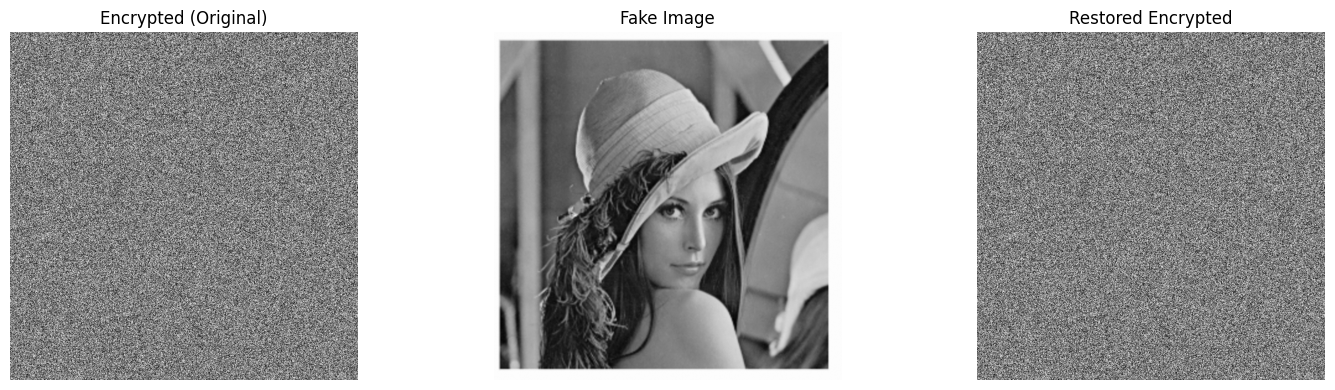

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

# 📥 إدخال المسارات وقيمة alpha
encrypted_path = input("🔐 Path to encrypted image (PNG): ")
cover_path     = input("📷 Path to cover image (any format): ")
alpha          = float(input("⚙️ Alpha value (e.g., 0.98): "))

# 🧩 تحميل الصور وتحويلها إلى رمادي
encrypted_img = Image.open(encrypted_path).convert('L')
cover_img     = Image.open(cover_path).convert('L')
cover_img     = cover_img.resize(encrypted_img.size)

# 🧩 تحويل الصور إلى NumPy باستخدام float64 لزيادة الدقة
encrypted = np.array(encrypted_img).astype(np.float64)
cover     = np.array(cover_img).astype(np.float64)

# ================================
# 🔐 1. إنشاء الصورة المزيفة (بـ float64)
# ================================
fake_float = (1 - alpha) * encrypted + alpha * cover

# ⚠️ نحفظ الصورة المزيفة للعرض فقط (بعد تحويلها لـ uint8)
fake_uint8 = np.clip(fake_float, 0, 255).astype(np.uint8)
Image.fromarray(fake_uint8).save("fake_image.png")
print("🌀 Fake image saved as: fake_image.png")

# ================================
# 🔓 2. استرجاع الصورة المشفّرة مباشرة من float64
# ================================
restored = (fake_float - alpha * cover) / (1 - alpha)
restored = np.round(restored)  # هذا مهم جدًا لمنع الكسور
restored = np.clip(restored, 0, 255).astype(np.uint8)
Image.fromarray(restored).save("restored_encrypted.png")
print("🔓 Restored image saved as: restored_encrypted.png")

# ================================
# ✅ 3. تقييم الدقة
# ================================
original = encrypted.astype(np.uint8)
max_diff = np.max(np.abs(original.astype(np.int16) - restored.astype(np.int16)))

def psnr(a, b):
    mse = np.mean((a - b) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

psnr_val = psnr(original, restored)

# ✅ تقرير النتيجة
print("\n📊 Comparison Report:")
if max_diff == 0:
    print("✅ Perfect match! Restored image is identical to encrypted image.")
else:
    print(f"⚠️ Max pixel difference: {max_diff}")
    print(f"📏 PSNR: {psnr_val:.2f} dB")

# ================================
# 🖼️ 4. عرض الصور الثلاث
# ================================
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Encrypted (Original)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(fake_uint8, cmap='gray')
plt.title("Fake Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored, cmap='gray')
plt.title("Restored Encrypted")
plt.axis('off')

plt.tight_layout()
plt.show()


🔐 Path to encrypted image (PNG): /content/encrypted_text_image.png
📷 Path to cover image (any format): /content/نور ستار1 (1).jpg
⚙️ Alpha value (e.g., 0.98): 0.99
🌀 Fake image saved as: fake_image.png
💾 Saved: fake_float.npy + cover.npy


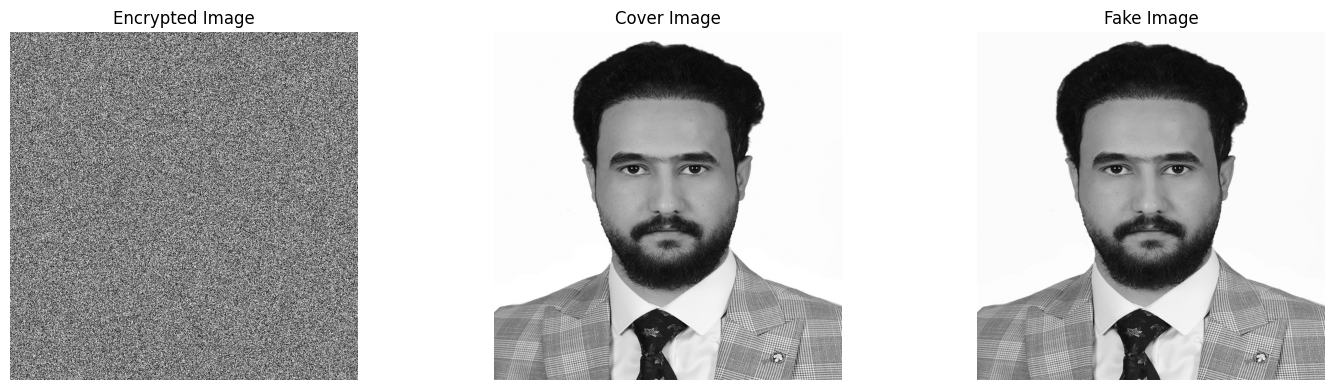

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 📥 إدخال المسارات وقيمة alpha
encrypted_path = input("🔐 Path to encrypted image (PNG): ")
cover_path     = input("📷 Path to cover image (any format): ")
alpha          = float(input("⚙️ Alpha value (e.g., 0.98): "))

# 🧩 تحميل الصور وتحويلها إلى رمادي
encrypted_img = Image.open(encrypted_path).convert('L')
cover_img     = Image.open(cover_path).convert('L')
cover_img     = cover_img.resize(encrypted_img.size)

# 🧩 تحويل الصور إلى NumPy باستخدام float64
encrypted = np.array(encrypted_img).astype(np.float64)
cover     = np.array(cover_img).astype(np.float64)

# 🔐 إنشاء الصورة المزيفة
fake_float = (1 - alpha) * encrypted + alpha * cover

# 💾 حفظ الصورة المزيفة (للعرض فقط)
fake_uint8 = np.clip(fake_float, 0, 255).astype(np.uint8)
Image.fromarray(fake_uint8).save("fake_image.png")

# 💾 حفظ نسخة دقيقة من الصورة المزيفة
np.save("fake_float.npy", fake_float)

# 💾 حفظ الغلاف لاستخدامه في فك التشفير
np.save("cover.npy", cover)

print("🌀 Fake image saved as: fake_image.png")
print("💾 Saved: fake_float.npy + cover.npy")

# ================================
# 🖼️ عرض الصور الثلاث
# ================================
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(encrypted.astype(np.uint8), cmap='gray')
plt.title("Encrypted Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cover.astype(np.uint8), cmap='gray')
plt.title("Cover Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fake_uint8, cmap='gray')
plt.title("Fake Image")
plt.axis('off')

plt.tight_layout()
plt.show()


⚙️ Enter alpha value used during encryption (e.g., 0.98): 0.99
🌀 Enter path to fake_float.npy: /content/fake_float.npy
📷 Enter path to cover.npy: /content/cover.npy
🔓 Restored image saved as: restored_encrypted.png


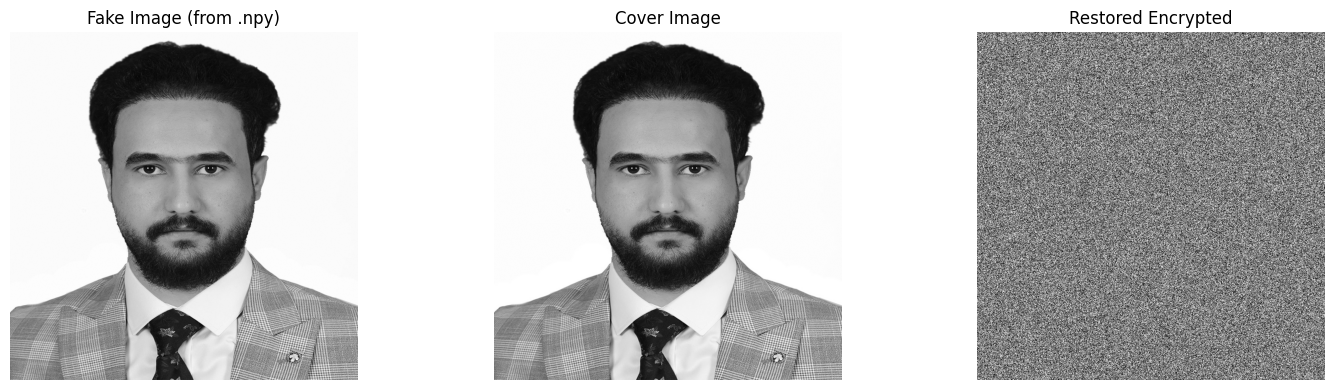

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 📥 إدخال قيمة alpha
alpha = float(input("⚙️ Enter alpha value used during encryption (e.g., 0.98): "))

# 📂 إدخال مسارات ملفات .npy
fake_npy_path = input("🌀 Enter path to fake_float.npy: ")
cover_npy_path = input("📷 Enter path to cover.npy: ")

# 💾 تحميل الملفات من المسارات المحددة
fake_float = np.load(fake_npy_path)
cover      = np.load(cover_npy_path)

# 🔓 استرجاع الصورة المشفّرة
restored = (fake_float - alpha * cover) / (1 - alpha)
restored = np.round(restored)
restored = np.clip(restored, 0, 255).astype(np.uint8)

# 💾 حفظ الصورة المسترجعة
Image.fromarray(restored).save("restored_encrypted.png")
print("🔓 Restored image saved as: restored_encrypted.png")

# 🖼️ عرض الصور الثلاث
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.clip(fake_float, 0, 255).astype(np.uint8), cmap='gray')
plt.title("Fake Image (from .npy)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cover.astype(np.uint8), cmap='gray')
plt.title("Cover Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored, cmap='gray')
plt.title("Restored Encrypted")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from PIL import Image

# 📂 أدخل المسارات
original_path = input("🗂️ Enter path to original encrypted image: ")
restored_path = input("🔁 Enter path to restored image: ")

# 🧩 تحميل الصورتين وتحويلهما إلى مصفوفات
original = np.array(Image.open(original_path).convert('L'))
restored = np.array(Image.open(restored_path).convert('L'))

# ✅ التأكد من تطابق الأبعاد
if original.shape != restored.shape:
    print("❌ Image sizes do not match.")
else:
    # 🔍 مقارنة بكسل ببكسل
    diff = np.abs(original.astype(int) - restored.astype(int))
    max_diff = np.max(diff)
    num_different = np.count_nonzero(diff)

    if num_different == 0:
        print("✅ Images are 100% identical. No differences found.")
    else:
        total_pixels = diff.size
        percentage = (num_different / total_pixels) * 100
        print(f"⚠️ Images differ in {num_different} pixels out of {total_pixels} ({percentage:.4f}%)")
        print(f"🔺 Maximum pixel difference: {max_diff}")


🗂️ Enter path to original encrypted image: /content/encrypted_text_image.png
🔁 Enter path to restored image: /content/restored_encrypted.png
✅ Images are 100% identical. No differences found.


In [ ]:
import os
import math
import hashlib
import secrets
import zipfile
import re
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# -------------------------------
# Key generation & matrix builder
# -------------------------------
def generate_unique_key(K: int) -> str:
    if not (1 <= K <= 256):
        raise ValueError("Key length must be between 1 and 256.")
    nums = list(range(256))
    secrets.SystemRandom().shuffle(nums)
    return ''.join(chr(b) for b in nums[:K])

def build_ascii_matrix(key: str) -> np.ndarray:
    flat = list(range(256))
    seen, vals = set(), []
    for c in key:
        v = ord(c) & 0xFF
        if v not in seen:
            seen.add(v)
            vals.append(v)
    remaining = [v for v in flat if v not in seen]
    full = vals + remaining
    return np.array(full, np.uint8).reshape((16,16))

# -------------------------------
# File reading
# -------------------------------
def read_text_file_bytes(path: str):
    ext = os.path.splitext(path)[1].lower()
    if ext == ".txt":
        raw = open(path, "rb").read()
    elif ext == ".docx":
        with zipfile.ZipFile(path) as z:
            xml = z.read('word/document.xml').decode('utf-8')
        texts = re.findall(r'<w:t[^>]*>([^<]+)</w:t>', xml)
        raw = ''.join(texts).encode("utf-8")
    else:
        raise ValueError("Unsupported extension")
    return list(raw)

def read_text_file_str(path: str) -> str:
    ext = os.path.splitext(path)[1].lower()
    if ext == ".txt":
        return open(path, "r", encoding="utf-8").read()
    elif ext == ".docx":
        with zipfile.ZipFile(path) as z:
            xml = z.read('word/document.xml').decode('utf-8')
        texts = re.findall(r'<w:t[^>]*>([^<]+)</w:t>', xml)
        return ''.join(texts)
    else:
        raise ValueError("Unsupported extension")

# -------------------------------
# Core encryption utilities
# -------------------------------
def text_hash_bytes(b: bytes) -> str:
    return hashlib.sha256(b).hexdigest()

def v_stream(seed: str, key: str, n: int) -> np.ndarray:
    comb = hashlib.sha256((key + seed).encode()).digest()
    out, ctr = bytearray(), 0
    while len(out) < n:
        blk = hashlib.sha256(comb + ctr.to_bytes(8,'big')).digest()
        out.extend(blk)
        ctr += 1
    return np.frombuffer(bytes(out[:n]), np.uint8)

def arnold_cat(img: np.ndarray, rnd: int=10) -> np.ndarray:
    N = img.shape[0]
    for _ in range(rnd):
        X, Y = np.meshgrid(np.arange(N), np.arange(N))
        img = img[(Y*2 + X) % N, (X + Y) % N]
    return img

def fast_lorenz_index(n: int, key: str, seed: str) -> np.ndarray:
    d = hashlib.sha256((key + seed).encode()).digest()
    x, y, z = [b/255.0 for b in d[:3]]
    sigma = 10 + d[3]/255*10
    rho   = 28 + d[4]/255*30
    beta  = 8/3 + d[5]/255*2
    seq, dt = [], 0.01
    for _ in range(n):
        dx = sigma*(y-x)
        dy = x*(rho-z)-y
        dz = x*y-beta*z
        x += dx*dt; y += dy*dt; z += dz*dt
        seq.append(y)
    arr = np.array(seq)
    arr = (arr - arr.min()) / (np.ptp(arr) + 1e-16)
    return np.argsort(arr)

# -------------------------------
# Encrypt text → image
# -------------------------------
def encrypt_text_to_image(data: list, key: str, rnd: int):
    seed = text_hash_bytes(bytes(data))
    print("🧚 Text Hash (SHA-256):", seed)

    n = len(data)
    N = math.ceil(math.sqrt(n))
    V = v_stream(seed, key, n)
    mat = build_ascii_matrix(key)

    vals = np.empty(n, np.uint8)
    for i, b in enumerate(data):
        r, c = divmod(b, 16)
        dr, dc = V[i] & 0x0F, V[i] >> 4
        vals[i] = mat[(r+dr) % 16, (c+dc) % 16]

    chk = int(v_stream(seed, key + seed, 1)[0]) % n
    vals[chk] = int(vals.sum() % 256)

    img = np.zeros(N*N, np.uint8)
    img[:n] = vals
    img = img.reshape((N, N))
    img = arnold_cat(img, rnd)

    xor_seq = v_stream(seed, key + "|xor", N*N).reshape((N, N))
    img ^= xor_seq

    idx = fast_lorenz_index(N*N, key, seed)
    img = img.flatten()[idx].reshape((N, N))
    return img, seed

# -------------------------------
# Render text inside image
# -------------------------------
def render_text_on_image(text, size):
    from PIL import ImageFont, ImageDraw

    text = text.strip()[:1000]
    img = Image.new('L', (size, size), 255)
    draw = ImageDraw.Draw(img)

    try:
        from matplotlib import font_manager
        font_path = font_manager.findfont(font_manager.FontProperties(family='DejaVu Sans'))
        base_font = ImageFont.truetype(font_path, 10)
    except:
        base_font = ImageFont.load_default()

    words = text.split()
    best_font_size = 10
    for font_size in range(10, 80):
        try:
            font = ImageFont.truetype(font_path, font_size)
        except:
            font = base_font
        lines = []
        line = ""
        for word in words:
            if draw.textlength(line + word + " ", font=font) < size - 20:
                line += word + " "
            else:
                lines.append(line)
                line = word + " "
        lines.append(line)
        total_height = len(lines) * (font_size + 6)
        if total_height < size - 20:
            best_font_size = font_size
        else:
            break

    font = ImageFont.truetype(font_path, best_font_size)
    lines = []
    line = ""
    for word in words:
        if draw.textlength(line + word + " ", font=font) < size - 20:
            line += word + " "
        else:
            lines.append(line)
            line = word + " "
    lines.append(line)

    y = (size - len(lines)*(best_font_size + 6)) // 2
    for line in lines:
        draw.text((10, y), line.strip(), fill=0, font=font)
        y += best_font_size + 6

    return np.array(img)

# -------------------------------
# Main
# -------------------------------
if __name__ == "__main__":
    txt_path   = input("📜 Text file (.txt/.docx): ").strip()
    cover_path = input("📷 Real image path: ").strip()
    K          = int(input("🔑 Key length (1–256): "))
    rnd        = int(input("🔁 Arnold rounds: "))
    alpha      = float(input("⚙️ Alpha (0–1): "))

    full_text = read_text_file_str(txt_path)
    print(f"📏 Text length: {len(full_text)} characters")

    data      = read_text_file_bytes(txt_path)
    key       = generate_unique_key(K)
    print("🔐 Generated Key (hex):", key.encode('latin-1').hex())

    enc_img, seed = encrypt_text_to_image(data, key, rnd)

    encrypted = enc_img.astype(np.float64)
    cover_img = Image.open(cover_path).convert('L').resize(enc_img.shape)
    cover     = np.array(cover_img).astype(np.float64)
    fake_float = (1 - alpha) * encrypted + alpha * cover
    fake_uint8 = np.clip(fake_float, 0, 255).astype(np.uint8)

    np.save("fake_float.npy", fake_float)
    np.save("cover.npy", cover)
    Image.fromarray(enc_img).save("encrypted_image.png")
    Image.fromarray(fake_uint8).save("fake_image.png")

    print("🌀 Fake image saved as: fake_image.png")
    print("📅 Saved: fake_float.npy + cover.npy")

    N = enc_img.shape[0]
    display_text = full_text[:1000]
    text_img = render_text_on_image(display_text, N)

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    plt.subplots_adjust(left=0.01, right=0.99, top=0.92, bottom=0.05, wspace=0.03)

    titles = [
        f"Original Text (first {len(display_text)} of {len(full_text)} characters)",
        "Encrypted Image",
        "Real Image",
        "Fake Image"
    ]
    images = [text_img, enc_img, cover.astype(np.uint8), fake_uint8]

    for ax, title, img in zip(axes, titles, images):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
            spine.set_visible(True)

    plt.show()


📜 Text file (.txt/.docx): /content/abbas.docx
📷 Real image path: /content/dalal.jpg
🔑 Key length (1–256): 157
🔁 Arnold rounds: 26
⚙️ Alpha (0–1): 0.999999
📏 Text length: 497123 characters
🔐 Generated Key (hex): e765b32b0e4e0dad8f19abfbbeb7f62779f5247b5d33e1a6843b05667ddded09181c8558e0436097939a70811a287edc5c875f31126888b1fc422638c634fd00ae71f3c39580a729b4e85bf415075996ba56da02bb4acc36ffa9769b6f3e0675ca8ef84883d2ebe5773cd308624c1b45c4de3ddb50d1f2e2559c354d4f0c2c039df7d97c14efc1631011168620d0bd2ae6af9efe403a8cb96b6132b8d8
🧚 Text Hash (SHA-256): a108e6ab024923b98151d2da0b766a40b566331dfe71ad59aa882aaabcd65bd6
🌀 Fake image saved as: fake_image.png
📅 Saved: fake_float.npy + cover.npy


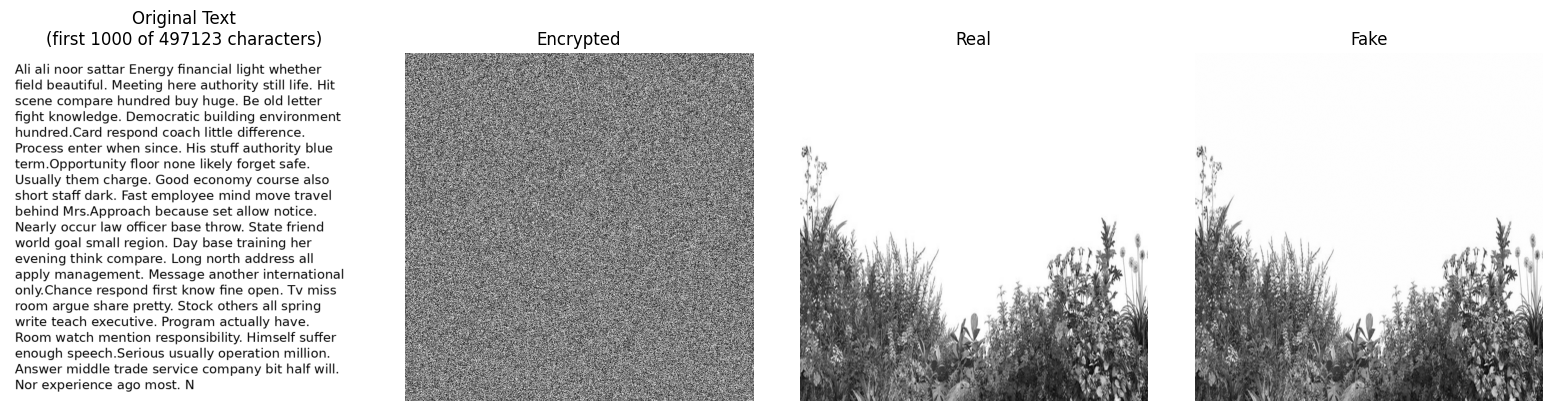

In [ ]:
import os
import math
import hashlib
import secrets
import zipfile
import re
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# -------------------------------
# Key generation & matrix builder
# -------------------------------
def generate_unique_key(K: int) -> str:
    if not (1 <= K <= 256):
        raise ValueError("Key length must be between 1 and 256.")
    nums = list(range(256))
    secrets.SystemRandom().shuffle(nums)
    return ''.join(chr(b) for b in nums[:K])

def build_ascii_matrix(key: str) -> np.ndarray:
    flat = list(range(256))
    seen, vals = set(), []
    for c in key:
        v = ord(c) & 0xFF
        if v not in seen:
            seen.add(v)
            vals.append(v)
    remaining = [v for v in flat if v not in seen]
    full = vals + remaining
    return np.array(full, np.uint8).reshape((16,16))

# -------------------------------
# File reading
# -------------------------------
def read_text_file_bytes(path: str):
    ext = os.path.splitext(path)[1].lower()
    if ext == ".txt":
        raw = open(path, "rb").read()
    elif ext == ".docx":
        with zipfile.ZipFile(path) as z:
            xml = z.read('word/document.xml').decode('utf-8')
        texts = re.findall(r'<w:t[^>]*>([^<]+)</w:t>', xml)
        raw = ''.join(texts).encode("utf-8")
    else:
        raise ValueError("Unsupported extension")
    return list(raw)

def read_text_file_str(path: str) -> str:
    ext = os.path.splitext(path)[1].lower()
    if ext == ".txt":
        return open(path, "r", encoding="utf-8").read()
    elif ext == ".docx":
        with zipfile.ZipFile(path) as z:
            xml = z.read('word/document.xml').decode('utf-8')
        texts = re.findall(r'<w:t[^>]*>([^<]+)</w:t>', xml)
        return ''.join(texts)
    else:
        raise ValueError("Unsupported extension")

# -------------------------------
# Core encryption utilities
# -------------------------------
def text_hash_bytes(b: bytes) -> str:
    return hashlib.sha256(b).hexdigest()

def v_stream(seed: str, key: str, n: int) -> np.ndarray:
    comb = hashlib.sha256((key + seed).encode()).digest()
    out, ctr = bytearray(), 0
    while len(out) < n:
        blk = hashlib.sha256(comb + ctr.to_bytes(8,'big')).digest()
        out.extend(blk)
        ctr += 1
    return np.frombuffer(bytes(out[:n]), np.uint8)

def arnold_cat(img: np.ndarray, rnd: int=10) -> np.ndarray:
    N = img.shape[0]
    for _ in range(rnd):
        X, Y = np.meshgrid(np.arange(N), np.arange(N))
        img = img[(Y*2 + X) % N, (X + Y) % N]
    return img

def fast_lorenz_index(n: int, key: str, seed: str) -> np.ndarray:
    d = hashlib.sha256((key + seed).encode()).digest()
    x, y, z = [b/255.0 for b in d[:3]]
    sigma = 10 + d[3]/255*10
    rho   = 28 + d[4]/255*30
    beta  = 8/3 + d[5]/255*2
    seq, dt = [], 0.01
    for _ in range(n):
        dx = sigma*(y-x)
        dy = x*(rho-z)-y
        dz = x*y-beta*z
        x += dx*dt; y += dy*dt; z += dz*dt
        seq.append(y)
    arr = np.array(seq)
    arr = (arr - arr.min()) / (np.ptp(arr) + 1e-16)
    return np.argsort(arr)

# -------------------------------
# Encrypt text → image
# -------------------------------
def encrypt_text_to_image(data: list, key: str, rnd: int):
    seed = text_hash_bytes(bytes(data))
    print("🧚 Text Hash (SHA-256):", seed)

    n = len(data)
    N = math.ceil(math.sqrt(n))
    V = v_stream(seed, key, n)
    mat = build_ascii_matrix(key)

    vals = np.empty(n, np.uint8)
    for i, b in enumerate(data):
        r, c = divmod(b, 16)
        dr, dc = V[i] & 0x0F, V[i] >> 4
        vals[i] = mat[(r+dr) % 16, (c+dc) % 16]

    chk = int(v_stream(seed, key + seed, 1)[0]) % n
    vals[chk] = int(vals.sum() % 256)

    img = np.zeros(N*N, np.uint8)
    img[:n] = vals
    img = img.reshape((N, N))
    img = arnold_cat(img, rnd)

    xor_seq = v_stream(seed, key + "|xor", N*N).reshape((N, N))
    img ^= xor_seq

    idx = fast_lorenz_index(N*N, key, seed)
    img = img.flatten()[idx].reshape((N, N))
    return img, seed

# -------------------------------
# Render text inside image
# -------------------------------
def render_text_on_image(text, size):
    from PIL import ImageFont, ImageDraw

    text = text.strip()[:1000]
    img = Image.new('L', (size, size), 255)
    draw = ImageDraw.Draw(img)

    try:
        from matplotlib import font_manager
        font_path = font_manager.findfont(font_manager.FontProperties(family='DejaVu Sans'))
        base_font = ImageFont.truetype(font_path, 10)
    except:
        base_font = ImageFont.load_default()

    words = text.split()
    best_font_size = 10
    for font_size in range(10, 80):
        try:
            font = ImageFont.truetype(font_path, font_size)
        except:
            font = base_font
        lines = []
        line = ""
        for word in words:
            if draw.textlength(line + word + " ", font=font) < size - 20:
                line += word + " "
            else:
                lines.append(line)
                line = word + " "
        lines.append(line)
        total_height = len(lines) * (font_size + 6)
        if total_height < size - 20:
            best_font_size = font_size
        else:
            break

    font = ImageFont.truetype(font_path, best_font_size)
    lines = []
    line = ""
    for word in words:
        if draw.textlength(line + word + " ", font=font) < size - 20:
            line += word + " "
        else:
            lines.append(line)
            line = word + " "
    lines.append(line)

    y = (size - len(lines)*(best_font_size + 6)) // 2
    for line in lines:
        draw.text((10, y), line.strip(), fill=0, font=font)
        y += best_font_size + 6

    return np.array(img)

# -------------------------------
# Main
# -------------------------------
if __name__ == "__main__":
    txt_path   = input("📜 Text file (.txt/.docx): ").strip()
    cover_path = input("📷 Real image path: ").strip()
    K          = int(input("🔑 Key length (1–256): "))
    rnd        = int(input("🔁 Arnold rounds: "))
    alpha      = float(input("⚙️ Alpha (0–1): "))

    full_text = read_text_file_str(txt_path)
    print(f"📏 Text length: {len(full_text)} characters")

    data      = read_text_file_bytes(txt_path)
    key       = generate_unique_key(K)
    print("🔐 Generated Key (hex):", key.encode('latin-1').hex())

    enc_img, seed = encrypt_text_to_image(data, key, rnd)

    encrypted = enc_img.astype(np.float64)
    cover_img = Image.open(cover_path).convert('L').resize(enc_img.shape)
    cover     = np.array(cover_img).astype(np.float64)
    fake_float = (1 - alpha) * encrypted + alpha * cover
    fake_uint8 = np.clip(fake_float, 0, 255).astype(np.uint8)

    np.save("fake_float.npy", fake_float)
    np.save("cover.npy", cover)
    Image.fromarray(enc_img).save("encrypted_image.png")
    Image.fromarray(fake_uint8).save("fake_image.png")

    print("🌀 Fake image saved as: fake_image.png")
    print("📅 Saved: fake_float.npy + cover.npy")

    N = enc_img.shape[0]
    display_text = full_text[:1000]
    text_img = render_text_on_image(display_text, N)

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    plt.subplots_adjust(left=0.01, right=0.99, top=0.92, bottom=0.05, wspace=0.03)

    titles = [

        f"Original Text\n(first {len(display_text)} of {len(full_text)} characters)",
        "Encrypted",
        "Real",
        "Fake"
    ]
    images = [text_img, enc_img, cover.astype(np.uint8), fake_uint8]

    for ax, title, img in zip(axes, titles, images):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
            spine.set_visible(True)

    plt.show()


🌀 Path to fake_float.npy: /content/fake_float 22.npy
📷 Path to cover.npy: /content/cover.npy
⚙️ Alpha value used during encryption: 0.999999
🔑 Enter encryption key (hex): e765b32b0e4e0dad8f19abfbbeb7f62779f5247b5d33e1a6843b05667ddded09181c8558e0436097939a70811a287edc5c875f31126888b1fc422638c634fd00ae71f3c39580a729b4e85bf415075996ba56da02bb4acc36ffa9769b6f3e0675ca8ef84883d2ebe5773cd308624c1b45c4de3ddb50d1f2e2559c354d4f0c2c039df7d97c14efc1631011168620d0bd2ae6af9efe403a8cb96b6132b8d8
🔒 Enter original text SHA-256 hash: a108e6ab024923b98151d2da0b766a40b566331dfe71ad59aa882aaabcd65bd6
📏 Enter original text length (bytes): 497123 
🔁 Enter Arnold Cat Map rounds: 26

🔍 Verification: ✅ Match


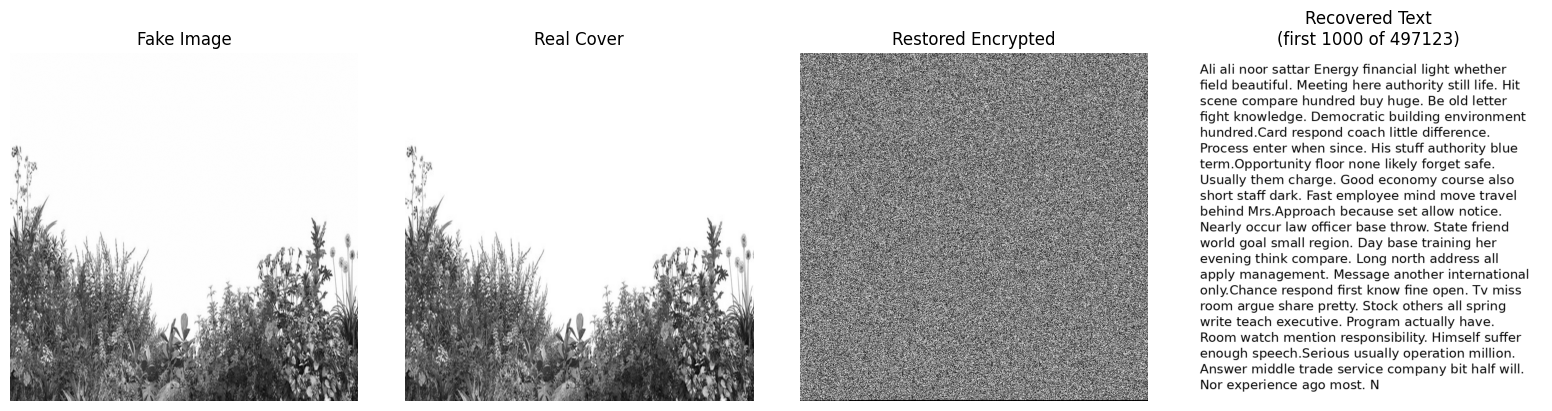

In [ ]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import math
import hashlib

# -------------------------------
# 🔧 الدوال المساعدة
# -------------------------------
def build_ascii_matrix(key: str) -> np.ndarray:
    flat = list(range(256))
    seen, vals = set(), []
    for c in key:
        v = ord(c) & 0xFF
        if v not in seen:
            seen.add(v)
            vals.append(v)
    remaining = [v for v in flat if v not in seen]
    full = vals + remaining
    return np.array(full, dtype=np.uint8).reshape((16, 16))

def v_stream(seed: str, key: str, n: int) -> np.ndarray:
    combined = hashlib.sha256((key + seed).encode()).digest()
    out, ctr = bytearray(), 0
    while len(out) < n:
        block = hashlib.sha256(combined + ctr.to_bytes(8, 'big')).digest()
        out.extend(block)
        ctr += 1
    return np.frombuffer(bytes(out[:n]), dtype=np.uint8)

def arnold_cat_inverse(img: np.ndarray, rounds: int) -> np.ndarray:
    N = img.shape[0]
    for _ in range(rounds):
        X, Y = np.meshgrid(np.arange(N), np.arange(N))
        Xn = (2 * X - Y) % N
        Yn = (-X + Y) % N
        img = img[Yn, Xn]
    return img

def fast_lorenz_index(n: int, key: str, seed: str) -> np.ndarray:
    d = hashlib.sha256((key + seed).encode()).digest()
    x, y, z = [b/255.0 for b in d[:3]]
    sigma = 10 + (d[3]/255.0)*10
    rho   = 28 + (d[4]/255.0)*30
    beta  = 8/3 + (d[5]/255.0)*2
    seq, dt = [], 0.01
    for _ in range(n):
        dx = sigma*(y - x)
        dy = x*(rho - z) - y
        dz = x*y - beta*z
        x += dx*dt; y += dy*dt; z += dz*dt
        seq.append(y)
    arr = np.array(seq)
    arr = (arr - arr.min()) / (np.ptp(arr) + 1e-16)
    return np.argsort(arr)

# -------------------------------
# 📝 دالة العرض من “كود التشفير” كما هي بالضبط
# -------------------------------
def render_text_on_image(text, size):
    from PIL import ImageFont, ImageDraw

    text = text.strip()[:1000]
    img = Image.new('L', (size, size), 255)
    draw = ImageDraw.Draw(img)

    # نستخدم نفس آلية اختيار الخط من كود التشفير
    try:
        from matplotlib import font_manager
        font_path = font_manager.findfont(font_manager.FontProperties(family='DejaVu Sans'))
        base_font = ImageFont.truetype(font_path, 10)
    except:
        base_font = ImageFont.load_default()

    words = text.split()
    best_font_size = 10
    # نجرب أحجام خطوط من 10 حتى 80
    for font_size in range(10, 80):
        try:
            font = ImageFont.truetype(font_path, font_size)
        except:
            font = base_font
        lines, line = [], ""
        for w in words:
            if draw.textlength(line + w + " ", font=font) < size - 20:
                line += w + " "
            else:
                lines.append(line)
                line = w + " "
        lines.append(line)
        total_h = len(lines) * (font_size + 6)
        if total_h < size - 20:
            best_font_size = font_size
        else:
            break

    # نعيد تقسيم النص بالخط المختار
    try:
        font = ImageFont.truetype(font_path, best_font_size)
    except:
        font = base_font

    lines, line = [], ""
    for w in words:
        if draw.textlength(line + w + " ", font=font) < size - 20:
            line += w + " "
        else:
            lines.append(line)
            line = w + " "
    lines.append(line)

    # نحسب نقطة البداية رأسياً لتوسيط النص
    y = (size - len(lines) * (best_font_size + 6)) // 2
    for l in lines:
        draw.text((10, y), l.strip(), fill=0, font=font)
        y += best_font_size + 6

    return np.array(img)


# -------------------------------
# 🔓 دالة فك التشفير الأساسية
# -------------------------------
def decrypt_text_from_fake_image(fake_npy_path, cover_npy_path, alpha,
                                  key_hex, seed, length, arnold_rounds):
    fake_float = np.load(fake_npy_path)
    cover = np.load(cover_npy_path)
    restored = (fake_float - alpha * cover) / (1 - alpha)
    restored = np.round(restored)
    restored = np.clip(restored, 0, 255).astype(np.uint8)

    key = bytes.fromhex(key_hex).decode("latin-1")
    N = math.ceil(math.sqrt(length))

    # 1) inverse Lorenz
    idx = fast_lorenz_index(N*N, key, seed)
    inv_idx = np.argsort(idx)
    img = restored.flatten()[inv_idx].reshape((N, N))

    # 2) inverse XOR
    xor_seq = v_stream(seed, key + "|xor", N*N).reshape((N, N))
    img ^= xor_seq

    # 3) inverse Arnold
    img = arnold_cat_inverse(img, arnold_rounds)

    # 4) extract n pixels
    flat = img.flatten()[:length].copy()

    # 5) restore checksum
    chk_pos = int(v_stream(seed, key + seed, 1)[0]) % length
    stored = int(flat[chk_pos])
    temp = np.delete(flat, chk_pos)
    expected = int(np.sum(temp.astype(np.int32)) % 256)
    flat[chk_pos] = (stored - expected) % 256

    # 6) inverse substitution
    V = v_stream(seed, key, length)
    mat = build_ascii_matrix(key)
    out = bytearray(length)
    for i, v in enumerate(flat):
        r2, c2 = np.argwhere(mat == v)[0]
        dr, dc = int(V[i] & 0x0F), int(V[i] >> 4)
        r = (int(r2) - dr) % 16
        c = (int(c2) - dc) % 16
        out[i] = r * 16 + c

    return out, img, cover, fake_float

# -------------------------------
# 🧪 التنفيذ والعرض 1×4
# -------------------------------
if __name__ == "__main__":
    fake_npy_path  = input("🌀 Path to fake_float.npy: ").strip()
    cover_npy_path = input("📷 Path to cover.npy: ").strip()
    alpha          = float(input("⚙️ Alpha value used during encryption: ").strip())
    key_hex        = input("🔑 Enter encryption key (hex): ").strip()
    seed           = input("🔒 Enter original text SHA-256 hash: ").strip()
    length         = int(input("📏 Enter original text length (bytes): ").strip())
    arnold_rounds  = int(input("🔁 Enter Arnold Cat Map rounds: ").strip())

    # 🔓 فك التشفير
    data_bytes, restored_img, cover, fake_float = decrypt_text_from_fake_image(
        fake_npy_path, cover_npy_path, alpha, key_hex, seed, length, arnold_rounds
    )

    # ✅ التحقق من الهاش
    plaintext = data_bytes.decode("utf-8", errors="replace")
    snippet = plaintext[:1000]
    recovered_hash = hashlib.sha256(data_bytes).hexdigest()
    status = "✅ Match" if recovered_hash == seed else "❌ Mismatch"
    print(f"\n🔍 Verification: {status}")
    #print(f"\n📝 Recovered Text (first 1000 chars):\n{snippet}")


    # ثم في نهاية العرض نفعل:
    text_img = render_text_on_image(snippet, restored_img.shape[0])

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    plt.subplots_adjust(left=0.01, right=0.99, top=0.92, bottom=0.05, wspace=0.03)

    titles = ["Fake Image", "Real Cover", "Restored Encrypted",
              f"Recovered Text\n(first {len(snippet)} of {length})"]
    images = [fake_float.astype(np.uint8), cover.astype(np.uint8),
              restored_img, text_img]

    for ax, title, img in zip(axes, titles, images):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
            spine.set_visible(True)

    plt.show()

